In [6]:
import pandas as pd
act = pd.read_csv("D:/000-Master/UserClustering/sample_activity_Oct-22-2018.csv")
act.rename(columns = {'Unnamed: 0':'index'},inplace=True)
loc = pd.read_csv("D:/000-Master/UserClustering/sample_location_Oct-22-2018.csv")
loc.rename(columns = {'Unnamed: 0':'index'},inplace=True)

act['start_date'] = act['local_start_time'].astype(str).str[:10]
act['local_start_time'] = act['local_start_time'].astype(str).str[:19]
act['local_start_time'] = pd.to_datetime(act['local_start_time'])

act['local_end_time'] = act['local_end_time'].astype(str).str[:19]
act['local_end_time'] = pd.to_datetime(act['local_end_time'])

act.head()
min(act['start_date'])
max(act['start_date'])

'2018-10-22'

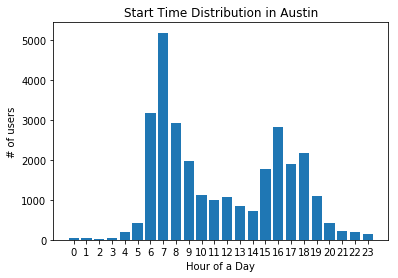

In [11]:
### Change start time to hour
act['start_hour'] = act.local_start_time.dt.hour

import numpy as np
import matplotlib.pyplot as plt

act_city = act.loc[act['city'] == 'austin']

numBar = act_city.groupby('start_hour').size().reset_index(name='counts')
# Create bars
height = numBar['counts']
bars = numBar['start_hour']
y_pos = np.arange(len(bars))

plt.bar(bars, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title('Start Time Distribution in Austin')
plt.xlabel('Hour of a Day')
plt.ylabel('# of users')
# Show graphic
plt.show()

In [13]:
### Connect activity with lon and lat
import numpy as np
cols = ['loc_id','center_lat','center_lon']
df = loc[cols]

df.rename(columns = {'loc_id':'orig_loc_id'},inplace=True)
x = pd.merge(act, df, on="orig_loc_id")
x.rename(columns = {'center_lat':'orig_lat',
                   'center_lon':'orig_lon'},inplace=True)

df.rename(columns = {'orig_loc_id':'dest_loc_id'},inplace=True)
x = pd.merge(x, df, on="dest_loc_id")
x.rename(columns = {'center_lat':'dest_lat',
                   'center_lon':'dest_lon'},inplace=True)

act = x
act.head()

D:\Download\Anaconda\A3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,index,trip_id,user_id,orig_loc_id,dest_loc_id,local_start_time,local_end_time,city,start_date,start_hour,orig_lat,orig_lon,dest_lat,dest_lon,orig_lat,orig_lon,dest_lat,dest_lon
0,1,2081071,16094,1,2,2018-03-14 12:07:18,2018-03-14 12:18:51,elpaso,2018-03-14,12,31.762442,-106.263962,31.775521,-106.308802,31.762442,-106.263962,31.775521,-106.308802
1,25,2159273,16094,1,2,2018-04-03 19:22:37,2018-04-03 19:38:30,elpaso,2018-04-03,19,31.762442,-106.263962,31.775521,-106.308802,31.762442,-106.263962,31.775521,-106.308802
2,71,2262622,16094,1,2,2018-04-28 11:21:08,2018-04-28 11:31:55,elpaso,2018-04-28,11,31.762442,-106.263962,31.775521,-106.308802,31.762442,-106.263962,31.775521,-106.308802
3,105,2352800,16094,1,2,2018-05-19 16:58:34,2018-05-19 17:11:17,elpaso,2018-05-19,16,31.762442,-106.263962,31.775521,-106.308802,31.762442,-106.263962,31.775521,-106.308802
4,110,2385335,16094,1,2,2018-05-28 14:03:31,2018-05-28 14:14:09,elpaso,2018-05-28,14,31.762442,-106.263962,31.775521,-106.308802,31.762442,-106.263962,31.775521,-106.308802


In [14]:
### how many times an OD pair appears; OD is unique
numTrips = act.groupby(['user_id','orig_loc_id','dest_loc_id']).size().reset_index(name='counts')
# print(len(numTrips[numTrips.duplicated(['orig_loc_id','dest_loc_id'], keep=False)])) # 0 repeated lon and lat
numTrips.head()
numTrips = pd.merge(numTrips, act[['orig_loc_id','dest_loc_id','orig_lat','orig_lon','dest_lat','dest_lon','city']], 
                    on = ['orig_loc_id','dest_loc_id'])
numTrips = numTrips.drop_duplicates()
numTrips.head()

,user_id,orig_loc_id,dest_loc_id,counts,orig_lat,orig_lat,orig_lon,orig_lon,dest_lat,dest_lat,dest_lon,dest_lon,city
0,2,14,15,29,32.301514,32.301514,-110.831139,-110.831139,32.285600,32.285600,-110.945060,-110.945060,tucson
29,2,14,23,4,32.301514,32.301514,-110.831139,-110.831139,32.221050,32.221050,-110.971110,-110.971110,tucson
33,2,14,12777,1,32.301514,32.301514,-110.831139,-110.831139,32.250938,32.250938,-110.927725,-110.927725,tucson
34,2,14,14571,8,32.301514,32.301514,-110.831139,-110.831139,32.236338,32.236338,-110.955351,-110.955351,tucson
42,2,14,18053,4,32.301514,32.301514,-110.831139,-110.831139,32.224884,32.224884,-110.971948,-110.971948,tucson


In [25]:
numTrips.describe()
numTrips.info() #no missing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5722 entries, 0 to 85202
Data columns (total 8 columns):
user_id        5722 non-null int64
orig_loc_id    5722 non-null int64
dest_loc_id    5722 non-null int64
counts         5722 non-null int64
orig_lat       5722 non-null float64
orig_lon       5722 non-null float64
dest_lat       5722 non-null float64
dest_lon       5722 non-null float64
dtypes: float64(4), int64(4)
memory usage: 402.3 KB


In [15]:
###  Group by weekday and weekend
from datetime import datetime, date, time
def weekday(data):
    dt = datetime.strptime(data, "%Y-%m-%d")
    tt = dt.timetuple()
    return tt[6]
    
act['day'] = (act['start_date']).apply(weekday) # weekday (0 = Monday)
wkn_act = act[(act.day >=5 )]
wkn_act = act[(act.day <=4 )]